In [1]:
from fastai.vision import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# planet = untar_data(URLs.PLANET_TINY)

In [4]:
data_dir = "D:\\workspace\\dataset\\adas_parsing_data_0409_to0416\\voc_fmt"

In [5]:
dl_tfms = get_transforms( max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
data = (ImageList.from_csv(data_dir, 'label.csv', folder='JPEGImages', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(dl_tfms, size=512)
        .databunch(bs=16) # todo change to 8
        .normalize(imagenet_stats))

In [7]:
# planet := WindowsPath('C:/Users/liuchao/.fastai/data/planet_tiny')

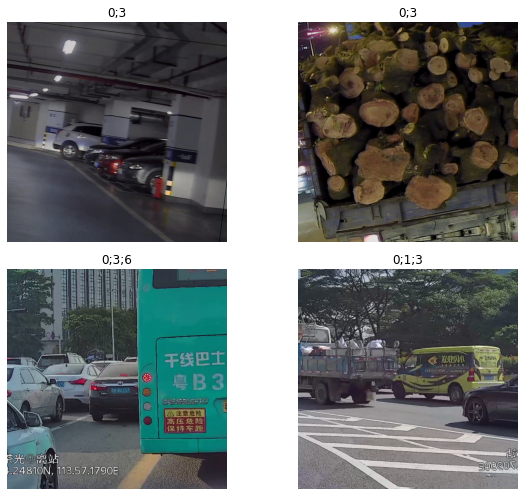

In [8]:
data.show_batch(rows=2, figsize=(9, 7))

In [9]:
from net.resnet50_cam import CamNet

In [10]:
net = CamNet()

In [11]:
learn = Learner(data, net, metrics=MultiLabelFbeta(beta=2))

In [12]:
net

CamNet(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FixedBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): FixedBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FixedBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): FixedBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [13]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [14]:
learn.fit(1)

epoch,train_loss,valid_loss,multi_label_fbeta,time
0,0.338356,0.325874,0.863643,04:17


In [17]:
learn.save('best')

In [15]:
# learn.fit_one_cycle(5, lr=1e-3)

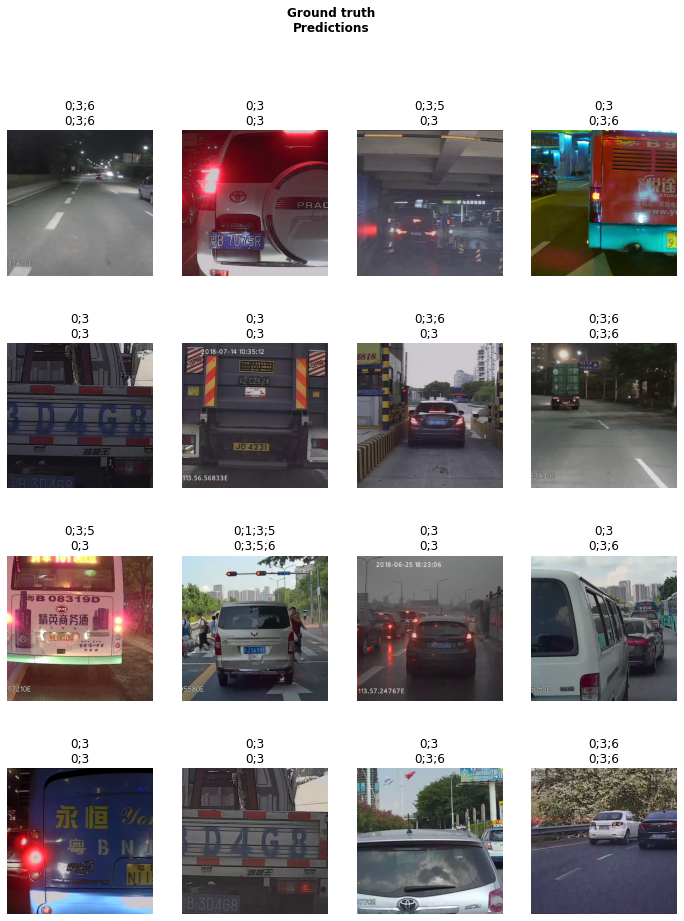

In [16]:
learn.show_results(rows=4, figsize=(12,15))

In [ ]:
learn.model

In [ ]:
learn.loss